# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [8]:
library ('tidyverse')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [9]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv'

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [15]:
# create the df_vacc_rates here


df_vacc_rates = read_csv(data_url, col_types = cols()) |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(num_high_mmr = sum(mmr >= 95, na.rm = TRUE))

head(df_vacc_rates)

state,num_high_mmr
<chr>,<int>
Arizona,593
Arkansas,2
California,12639
Colorado,939
Connecticut,478
Illinois,6893


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [21]:
df_vacc_rates = read_csv(data_url, col_types = cols()) |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(num_high_mmr = sum(mmr >= 95, na.rm = TRUE)) |>
    arrange(num_high_mmr)

head(df_vacc_rates)


state,num_high_mmr
<chr>,<int>
Arkansas,2
North Dakota,164
Maine,169
Vermont,231
South Dakota,277
Montana,370


**A: Arkansas**

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

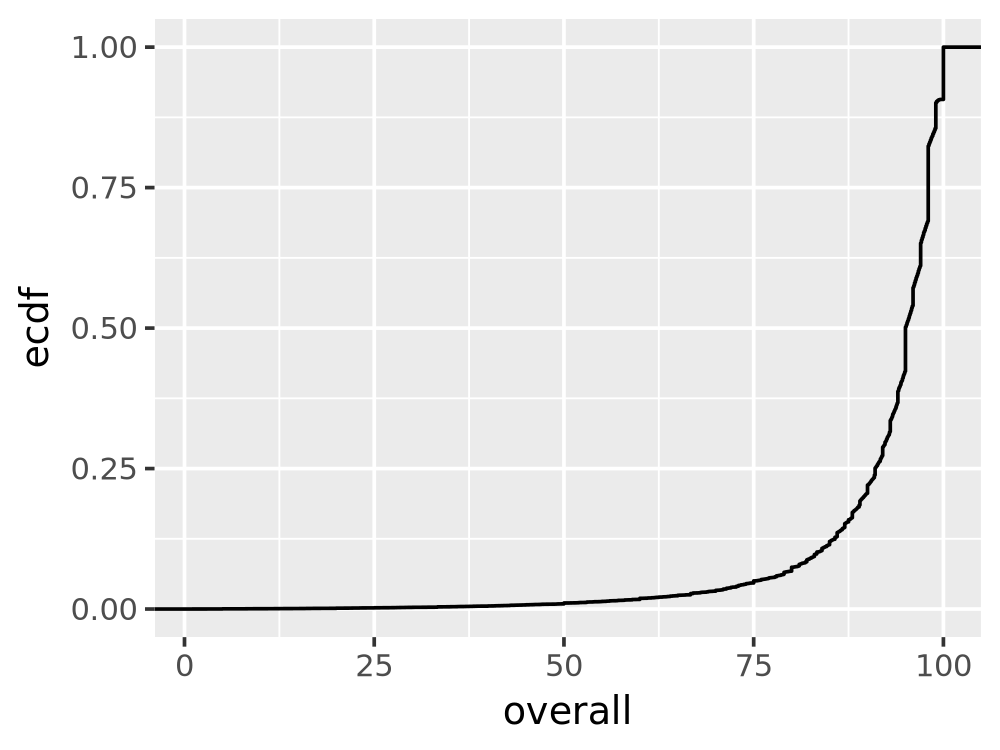

In [24]:
df = read_csv(data_url, col_types = cols()) |>
    filter(overall >= 0)

ggplot(df, aes(x=overall)) + 
    stat_ecdf(geom = "step")

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
No, it is not.